In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\nicol\anaconda3\envs\piia\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_name = 'maregraphie_csv_4_2020_2021.csv'
data_ = read_csv(file_name, header=0, index_col=0, parse_dates=True)  # squeeze=True
df = data_.drop(columns=['Source'])
dfcol = ['Valeur']
df = df.resample('H').mean()
df

,Valeur
Date,
2020-01-02 00:00:00,3.705
2020-01-02 01:00:00,3.209
2020-01-02 02:00:00,2.844
2020-01-02 03:00:00,2.822
2020-01-02 04:00:00,3.388
...,...
2021-12-31 19:00:00,2.316
2021-12-31 20:00:00,1.826
2021-12-31 21:00:00,2.082


array([<AxesSubplot:xlabel='Date'>], dtype=object)

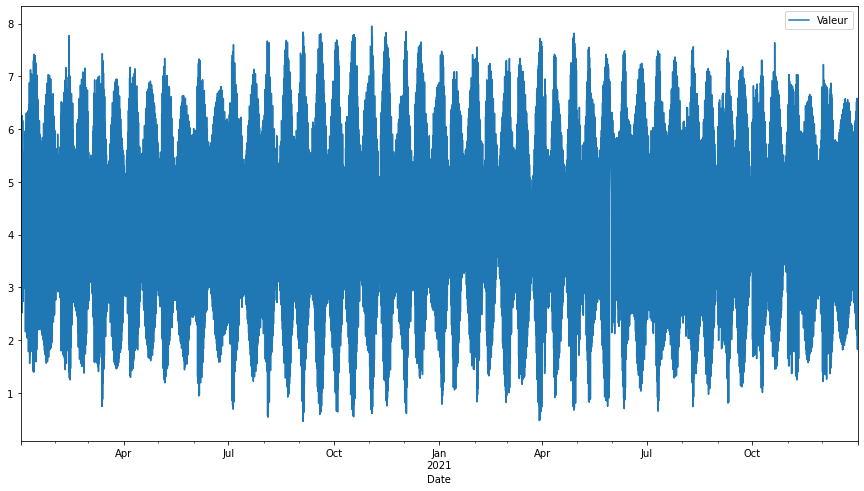

In [3]:
preprocessed = df.copy()
for key in preprocessed.keys():
    temp = preprocessed[key]
    nan_index = temp.isnull()
    temp = temp.interpolate('linear')
    results = seasonal_decompose(temp, period=24*30*12, model='additive', extrapolate_trend='freq')
    for i, real in enumerate(nan_index):
        if real == True:
            results.trend.iloc[i] = np.nan
            dt = str(results.resid.index[i])
            results.seasonal.iloc[i] = results.seasonal.loc[dt]
            results.resid.iloc[i] = results.resid.loc[dt]
            
    preprocessed[key] = results.trend.interpolate('linear') + results.seasonal + results.resid

preprocessed.plot(figsize=(15, 8), subplots=True)

In [4]:
preprocessed['Valeur']

Date
2020-01-02 00:00:00    3.705
2020-01-02 01:00:00    3.209
2020-01-02 02:00:00    2.844
2020-01-02 03:00:00    2.822
2020-01-02 04:00:00    3.388
                       ...  
2021-12-31 19:00:00    2.316
2021-12-31 20:00:00    1.826
2021-12-31 21:00:00    2.082
2021-12-31 22:00:00    2.926
2021-12-31 23:00:00    4.097
Freq: H, Name: Valeur, Length: 17520, dtype: float64

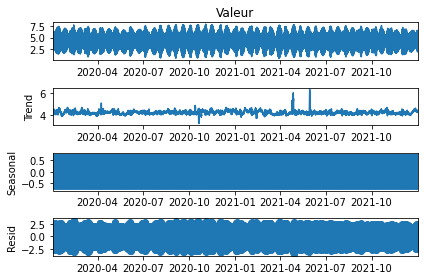

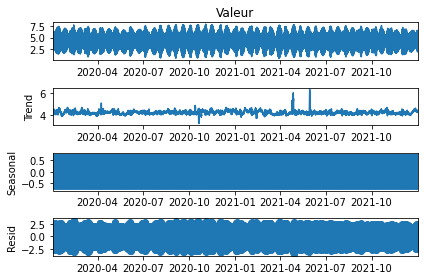

In [5]:
results = seasonal_decompose(preprocessed['Valeur'])
results.plot()

In [6]:
len(df)

17520

In [7]:
split = pd.to_datetime('2021/09/01')

In [8]:
train = preprocessed[:split]
test = preprocessed[split:]

In [9]:
print(train)
print('-' * 50)
print(test)

                     Valeur
Date                       
2020-01-02 00:00:00   3.705
2020-01-02 01:00:00   3.209
2020-01-02 02:00:00   2.844
2020-01-02 03:00:00   2.822
2020-01-02 04:00:00   3.388
...                     ...
2021-08-31 20:00:00   4.431
2021-08-31 21:00:00   4.738
2021-08-31 22:00:00   4.898
2021-08-31 23:00:00   4.851
2021-09-01 00:00:00   6.043

[14593 rows x 1 columns]
--------------------------------------------------
                     Valeur
Date                       
2021-09-01 00:00:00   6.043
2021-09-01 01:00:00   5.796
2021-09-01 02:00:00   5.149
2021-09-01 03:00:00   4.358
2021-09-01 04:00:00   3.536
...                     ...
2021-12-31 19:00:00   2.316
2021-12-31 20:00:00   1.826
2021-12-31 21:00:00   2.082
2021-12-31 22:00:00   2.926
2021-12-31 23:00:00   4.097

[2928 rows x 1 columns]


C:\Users\nicol\AppData\Local\Temp\ipykernel_11712\3157296936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_11712\3157296936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


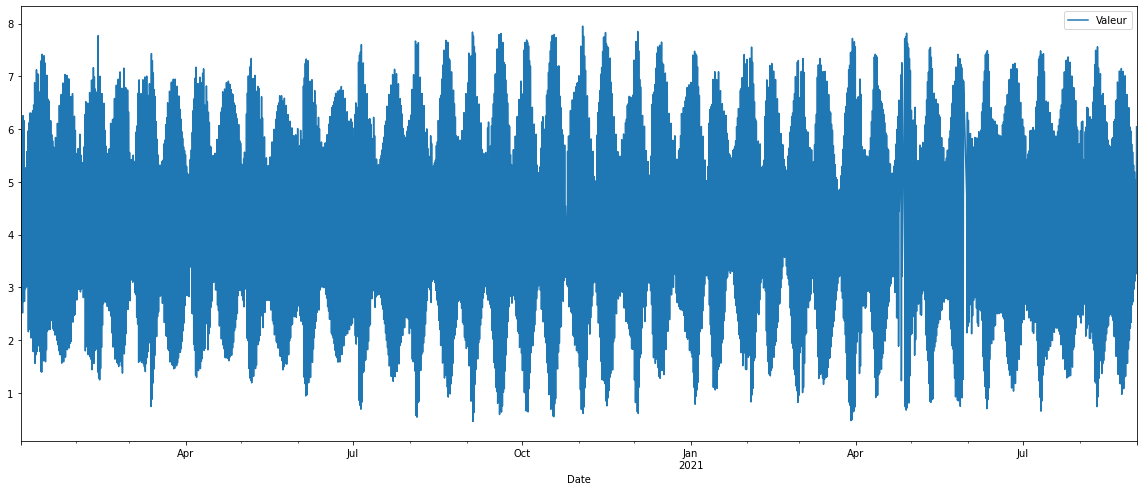

In [10]:
train.dropna(inplace=True)
test.dropna(inplace=True)
axes = train[dfcol].plot(figsize=(20, 8), subplots=True)

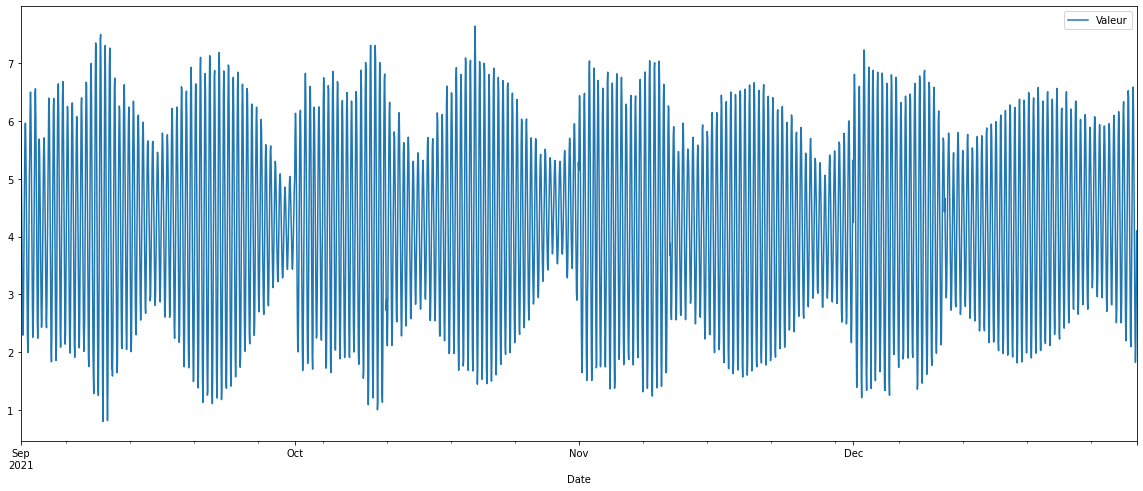

In [11]:
axes = test[dfcol].plot(figsize=(20, 8), subplots=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(),df.tail()

(                     Valeur
 Date                       
 2020-01-02 00:00:00   3.705
 2020-01-02 01:00:00   3.209
 2020-01-02 02:00:00   2.844
 2020-01-02 03:00:00   2.822
 2020-01-02 04:00:00   3.388,
                      Valeur
 Date                       
 2021-12-31 19:00:00   2.316
 2021-12-31 20:00:00   1.826
 2021-12-31 21:00:00   2.082
 2021-12-31 22:00:00   2.926
 2021-12-31 23:00:00   4.097)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.43335557],
       [0.36717812],
       [0.31847899],
       [0.3155437 ],
       [0.39106071],
       [0.50020013],
       [0.606004  ],
       [0.69152769],
       [0.73515677],
       [0.73035357]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.43335557 0.36717812 0.31847899]
Predict this y: 
 [[0.3155437]]


In [19]:
X.shape

(1, 3, 1)

In [20]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
14581/14581 [==============================] - 138s 9ms/step - loss: 0.0024
Epoch 2/50
14581/14581 [==============================] - 163s 11ms/step - loss: 4.9888e-04
Epoch 3/50
14581/14581 [==============================] - 157s 11ms/step - loss: 4.2706e-04
Epoch 4/50
14581/14581 [==============================] - 150s 10ms/step - loss: 3.9266e-04
Epoch 5/50
14581/14581 [==============================] - 131s 9ms/step - loss: 3.7001e-04
Epoch 6/50
14581/14581 [==============================] - 131s 9ms/step - loss: 3.6013e-04
Epoch 7/50
14581/14581 [==============================] - 130s 9ms/step - loss: 3.4633e-04
Epoch 8/50
14581/14581 [==============================] - 130s 9ms/step - loss: 3.4295e-04
Epoch 9/50
14581/14581 [==============================] - 129s 9ms/step - loss: 3.3581e-04
Epoch 10/50
14581/14581 [==============================] - 129s 9ms/step - loss: 3.2663e-04
Epoch 11/50
14581/14581 [==============================] - 129s 9ms/step - loss: 3.2357e-0

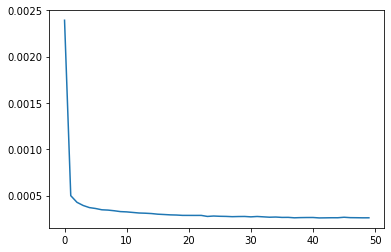

In [25]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.show()

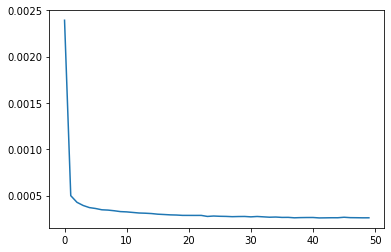

In [26]:
loss_per_epoch = model.history.history['accuracy']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.show()

In [27]:
last_train_batch = scaled_train[-12:]

In [28]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [29]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 584ms/step


array([[0.7227022]], dtype=float32)

In [30]:
scaled_test[0]

array([0.74529686])

In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [32]:
len(test_predictions

2928

In [33]:
test.head()

,Valeur,Predictions
Date,,
2021-09-01 00:00:00,6.043,5.873653
2021-09-01 01:00:00,5.796,5.511448
2021-09-01 02:00:00,5.149,4.982966
2021-09-01 03:00:00,4.358,4.416135
2021-09-01 04:00:00,3.536,3.921326


In [34]:
true_predictions = scaler.inverse_transform(test_predictions)

In [46]:
test['Predictions'] = true_predictions

C:\Users\nicol\AppData\Local\Temp\ipykernel_11712\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

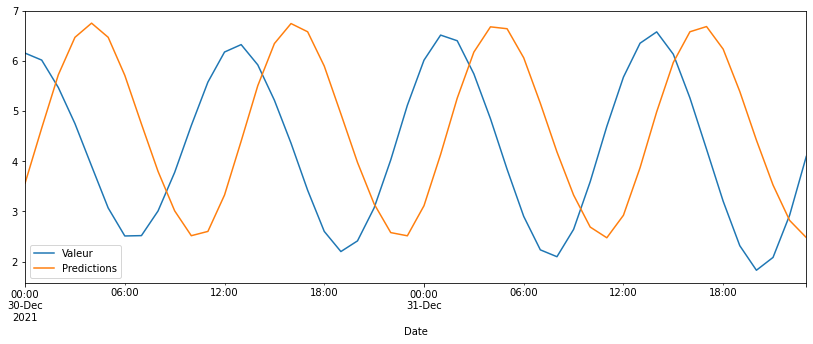

In [49]:
test[-48:].plot(figsize=(14,5))

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Valeur'],test['Predictions']))
print(rmse)

2.222039011737078
